# Computergestützte Mathematik zur Analysis

## Lektion 8

Rüdiger W. Braun, 06.12.2018

In [1]:
from sympy import *
init_printing()
import numpy as np
%matplotlib qt
import matplotlib.pyplot as plt

Summen und Reihen

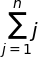

In [2]:
j = Symbol('j')
n = Symbol('n')
S1 = Sum(j, (j, 1, n))
S1

In [3]:
S1.doit()

In [4]:
S2 = Sum(j**4, (j, 1, n))
S2.doit()

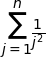

In [6]:
S3

In [5]:
S3 = Sum(1/j**2, (j, 1, n))
S3.doit()

In [7]:
S4 = Sum(1/j**2, (j,1,oo))
S4.doit()

In [8]:
S5 = Sum(1/j**n, (j,1,oo))
S5.doit()

⎧  ζ(n)     for n > 1
⎪                    
⎪  ∞                 
⎪ ___                
⎪ ╲                  
⎨  ╲    -n           
⎪  ╱   j    otherwise
⎪ ╱                  
⎪ ‾‾‾                
⎪j = 1               
⎩                    

`sympy` rechnet komplex

In [10]:
x = Symbol('x')
y = Symbol('y')
z = x + I*y

In [12]:
I**2

In [11]:
re(z**4).expand()

In [13]:
x = Symbol('x', real=True)
y = Symbol('y', real=True)
z = x + I*y

In [15]:
re(z**4).expand()

In [16]:
(z**4).expand().collect(I)

Lösen von Gleichungen

In [17]:
x = Symbol('x')
y = Symbol('y')

In [20]:
Glg = (x-1)**2 == 4  # syntaktisch richtig, 
Glg                  # aber sinnlos

False

In [21]:
Glg = Eq((x-1)**2, 4)
Glg

In [22]:
Glg.lhs, Glg.rhs

In [23]:
Lsg = solveset(Glg)
Lsg

Probe

In [24]:
for l in Lsg:
    display(Glg.subs(x,l))

In [25]:
glg = Eq(sin(x/2), cos(x/2))
glg

In [26]:
Lsg = solveset(glg)
Lsg

In [27]:
print(Lsg)

Union(ImageSet(Lambda(_n, 4*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 4*_n*pi + 5*pi/2), Integers))


In [28]:
for l, n in zip(Lsg, range(5)):
    display(l)
    display(glg.subs(x,l))

In [29]:
glg = Eq(sin(x), cos(2*x))
Lsg = solveset(glg)
Lsg

In [30]:
f = glg.lhs - glg.rhs
f

In [33]:
xn = np.linspace(-3*np.pi, 3*np.pi, 500)
fn = lambdify(x, f, 'numpy')
plt.plot(xn, fn(xn));

In [32]:
l_list = [l for l,n in zip(Lsg, range(9))]
l_list.sort()
display([N(l) for l in l_list])
display([re(f.diff(x).subs(x,l)) for l in l_list])

Polynomgleichungen

In [34]:
glg = Eq(x**4, -1)
glg

In [35]:
solveset(glg)

In [38]:
solveset(glg, domain=Reals)

In [53]:
p = ((x**5 - 20*x + 7)**1).expand()
glg = Eq(p,0)
glg

In [52]:
Lsg = solveset(glg)
Lsg

Die Lösungen können nicht durch Wurzeln ausgedrückt werden.  Fragen Sie Dr. Schröer.

In [46]:
Lsg = solveset(glg, domain=Reals)
Lsg

Die drei Lösungen unterscheiden sich aber

In [ ]:
for l in Lsg:
    display(l._get_interval())

In [49]:
for l in Lsg:
    intervall = l._get_interval()
    display([N(intervall.a), N(intervall.b)])

In [59]:
plt.figure()
xn = np.linspace(-4, 4)
fn = lambdify(x, p) 
plt.plot(xn, fn(xn))
plt.axis(ymin=-30, ymax=30);

In [57]:
for l in Lsg:
    display(glg.subs(x,l).simplify())

KeyboardInterrupt: 

In [58]:
alpha = glg.lhs.subs(x,l).simplify()
alpha

Das ist genau das Polynom, dessen Nullstelle $\alpha$ ist.  `sympy` kann das sehen, wenn man ein Hilfsmittel aus der Algebra einsetzt.

Das Minimalpolynom von $\alpha$ ist ein Polynom $p$ minimalen Grades mit ganzen Koeffizienten mit $p(\alpha)=0$.  

Existiert nicht immer.  Thema der Algebra.

In [61]:
minimal_polynomial(18)

In [64]:
minimal_polynomial(sqrt(Rational(3,2)))

In [ ]:
#minimal_polynomial(pi)
# NotAlgebraic Error

In [65]:
minimal_polynomial(0)

In [68]:
for l in Lsg:
    display(minimal_polynomial(glg.lhs.subs(x,l)))

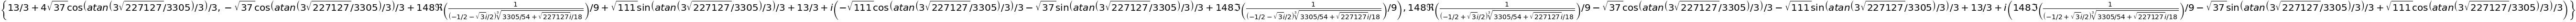

In [69]:
q = x**3 - 13*x**2 + 7*x + 10
glg =Eq(q,0)
solveset(glg)

In [70]:
plt.figure()
xn = np.linspace(-1, 13) 
qn = lambdify(x, q)
plt.plot(xn, qn(xn));

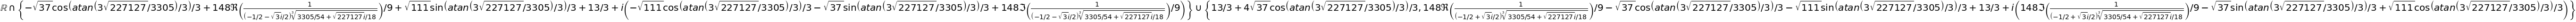

In [71]:
solveset(glg, domain=Reals)

Das heißt, er weiß nicht, welche Lösungen reell sind.

Die alte Funktion, `solve`, ist hier besser.

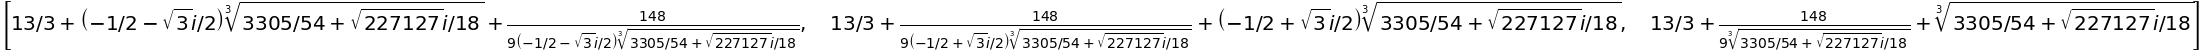

In [72]:
lsg = solve(glg)
lsg

In [73]:
lsg = solve(glg, cubics=False)
lsg 

In [74]:
for l in lsg:
    display(l._get_interval())

(-1, 0)

(1, 2)

(12, 13)

In [75]:
Glg1 = Eq(x, 2*y)
Glg2 = Eq(x**2+y**2, 1)
Gls = {Glg1, Glg2}
Gls

Für Gleichungssysteme gibt es vorerst nur `solve` mit einem etwas anderen API

In [76]:
Lsg = solve(Gls)
Lsg   # Ausgabe als Dictionary, wenn Daten als Menge gegeben

In [77]:
for l in Lsg:
    display([glg.subs(l) for glg in Gls])

In [78]:
a = Symbol('a')
Glg1 = Eq(x, a*y)
Gls = {Glg1, Glg2}
Gls

In [79]:
solve(Gls)

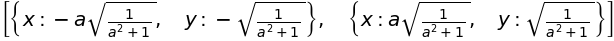

In [80]:
Lsg = solve(Gls, {x,y})
Lsg

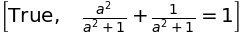

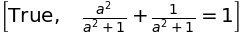

In [81]:
for l in Lsg:
    display([glg.subs(l) for glg in Gls])

In [82]:
for l in Lsg:
    display([glg.subs(l).simplify() for glg in Gls])